In [1]:
import cv2
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt 
import tensorflow.compat.v1 as tf
import random

tf.disable_v2_behavior()
print("Num GPUs Available: ", tf.test.is_built_with_cuda())

path="./data"
IMG_SIZE=100

Instructions for updating:
non-resource variables are not supported in the long term
Num GPUs Available:  True


In [43]:
dog_files=os.listdir(path+'/dogs')
wolf_files=os.listdir(path+'/wolves')
image_paths = []
#label: 0 for dog ,1 for wolf # woof -woof
labels=[]
img=[]
for file in dog_files:
    image = cv2.imread(path+'/'+'dogs/'+file)
    image = cv2.resize(image, (IMG_SIZE,IMG_SIZE))
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    norm_image = image/255.0 
    # Creating and saving each image in the form of numerical data in an array
    img.append(image.flatten())
    labels.append([1,0])
    image_paths.append(path+'/'+'dogs/'+file)
for file in wolf_files:
    image = cv2.imread(path+'/'+'wolves/'+file)
    image = cv2.resize(image, (IMG_SIZE,IMG_SIZE))
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    norm_image = image/255.0 
          #Creating and saving each image in the form of numerical data in an array
    image_paths.append(path+'/'+'wolves/'+file)

    img.append(image.flatten())
    labels.append([0,1])

In [44]:
df={'data':img,'label':labels}
df=pd.DataFrame(df)
df = df.sample(frac=1).reset_index(drop=True)

[1, 0]


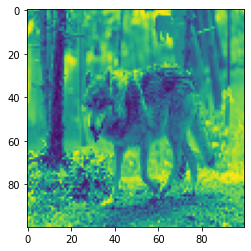

In [45]:
plt.imshow(df.data[0].reshape(IMG_SIZE,IMG_SIZE))
print(df.label[1])
#main_train_df,test_df=train_test_split(df, test_size=0.2,shuffle=True,random_state=42)
#train_df,val_df=train_test_split(main_train_df, test_size=0.1,shuffle=True,random_state=42)
#random.shuffle(df)
train_df=df[:1400]
val_df=df[1400:1600]
test_df=df[1600:]


In [ ]:
def getData(dataset):
    img = []
    label = []
    for x, y in dataset:
        img.append(x)
        label.append(y)
    return img,label

In [46]:
x_train=list(train_df.data)
y_train=list(train_df.label)
x_val=list(val_df.data)
y_val=list(val_df.label)
x_test=list(test_df.data)
y_test=list(test_df.label)

In [47]:
X=tf.placeholder(tf.float32,[None,IMG_SIZE*IMG_SIZE])
Y=tf.placeholder(tf.float32,[None,2])
W=tf.Variable(tf.zeros([IMG_SIZE*IMG_SIZE,2]))
b=tf.Variable(tf.zeros([2]))
eps = 1e-12

In [62]:

h =tf.matmul(X,W)+b#1 / (1.0 + tf.exp(-(tf.matmul(img,W) + b)))
# softmax
actv = tf.nn.sigmoid(h)
# cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(pred), reduction_indices=1))
# optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
prediction = tf.argmax(actv,1)
correct_prediction = tf.equal(prediction, tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
# loss1 = -(Y * tf.log(h + eps) + (1 - Y) * tf.log( 1 - h + eps))
loss1=tf.nn.sigmoid_cross_entropy_with_logits(labels=Y,logits=h)
loss = tf.reduce_mean(loss1)
# loss = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(actv), reduction_indices=1)) 
# loss = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(pred), reduction_indices=1)) 
alpha = 0.000000001
update = tf.train.GradientDescentOptimizer(alpha).minimize(loss)

loss_data = []


In [33]:
batch_size = 100
num_batches = int(len(x_train)/batch_size)



In [63]:
arr =[alpha,alpha+alpha/2]
for j in [0,1]:
    print(f"shitttttttt {arr[j]}")
    update = tf.train.GradientDescentOptimizer(arr[j]).minimize(loss)
    sess=tf.Session()
    sess.run(tf.global_variables_initializer())
    for i in range(0,1000):
        if i%100==0:
            loss_data.append(loss.eval(session= sess, feed_dict = {X:x_train,Y:y_train}))
            train_acc,train_loss = sess.run([accuracy,loss], feed_dict={X:x_train,Y:y_train})
            print (" Training accuracy: %.10f, Training loss: %.10f" % (train_acc, train_loss))
            val_acc,val_loss = sess.run([accuracy,loss], feed_dict={X:x_val,Y:y_val})
            print (" Validation accuracy: %.10f, Validation loss: %.10f" % (val_acc,val_loss))
        sess.run([update],feed_dict={X:x_train,Y:y_train})
print(loss_data)

shitttttttt 1e-09
 Training accuracy: 0.5028571486, Training loss: 0.6931471825
 Validation accuracy: 0.4950000048, Validation loss: 0.6931471229
 Training accuracy: 0.5792857409, Training loss: 0.6908568740
 Validation accuracy: 0.5899999738, Validation loss: 0.6904246807
 Training accuracy: 0.5892857313, Training loss: 0.6887989640
 Validation accuracy: 0.6299999952, Validation loss: 0.6879575253
 Training accuracy: 0.5957142711, Training loss: 0.6869143844
 Validation accuracy: 0.6299999952, Validation loss: 0.6856774092
 Training accuracy: 0.6000000238, Training loss: 0.6851856112
 Validation accuracy: 0.6399999857, Validation loss: 0.6835658550
 Training accuracy: 0.5992857218, Training loss: 0.6835981011
 Validation accuracy: 0.6549999714, Validation loss: 0.6816082001
 Training accuracy: 0.6028571725, Training loss: 0.6821386814
 Validation accuracy: 0.6499999762, Validation loss: 0.6797913313
 Training accuracy: 0.6035714149, Training loss: 0.6807954311
 Validation accuracy: 0.

In [ ]:
def getBatch(data,d_label,curr_index,batch_size):
    return data[curr_index:curr_index+batch_size],d_label[curr_index:curr_index+batch_size]

In [ ]:
correct_prediction = tf.equal(tf.argmax(pred,1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print(sess.run(accuracy, feed_dict={X: x_val, Y: y_val}))

In [ ]:
plt.ylabel('loss')
plt.xlabel('iteration in 1000')
plt.plot(loss_data)


In [ ]:

print(sess.run(accuracy, feed_dict={X: x_val, Y: y_val}))

In [ ]:
k={'data':x,'label':labels}
type(np.array(k['data']))

In [ ]:
np.array(k['data'])

In [ ]:
numeric_dataset = tf.data.Dataset.from_tensor_slices((train_df.data, train_df.label))